In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic

In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Project/predicted_sentiment_scores_v4.csv")
data

<ipython-input-3-c8257f31fa25>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Project/predicted_sentiment_scores_v4.csv")


,hotel,star,review,date,price,address,district,length,clean_review,latitude,longitude,predicted_score
0,유성 메이호텔,5,매우 만족합니다 깨끗하고 시설도좋고 주변에 먹을것도많고 주차자리도 매우 널하고 1층...,2024.10.18,60000,대전 유성구 봉명동 551-17,유성구,250,매우 만족합니다 깨끗하고 시설도 좋고 주변에 먹을 것도 많고 주차 자리도 매우 널하...,36.354776,127.342764,0.984308
1,유성 메이호텔,4,주변에 숙소가 많은데 다른숙소를 주로 이용하다 이번에 처음 이용해보았는데 객실도 너...,2024.10.18,60000,대전 유성구 봉명동 551-17,유성구,262,주변에 숙소가 많은데 다른 숙소를 주로 이용하다 이번에 처음 이용해 보았는데 객실도...,36.354776,127.342764,0.985063
2,유성 메이호텔,5,봉명동 술집에서 술마실때 위치가 너무 좋아요 항상 찾는곳으로 주차장도 지상도 있고 ...,2024.10.28,60000,대전 유성구 봉명동 551-17,유성구,255,봉명동 술집에서 술 마실 때 위치가 너무 좋아요 항상 찾는 곳으로 주차장도 지상도 ...,36.354776,127.342764,0.985439
3,유성 메이호텔,5,짐 놓고갔엇는데 프론트 분 이 되게 친절하셨었어요 아 송주차장이 없지만 그래도 주변...,2024.10.29,60000,대전 유성구 봉명동 551-17,유성구,192,짐 놓고 갔었는데 프런트 분 이 되게 친절하셨었어요 아 송 주차장이 없지만 그래도 ...,36.354776,127.342764,0.985395
4,유성 메이호텔,4,할머니 댁같은 느낌객실깔끔한데 오래된 느낌은 못 지우겠어요 전담을 옆방에서 피는지 ...,2024.11.05,60000,대전 유성구 봉명동 551-17,유성구,259,할머니 댁 같은 느낌 객실 깔끔한데 오래된 느낌은 못 지우겠어요 전담을 옆방에서 피...,36.354776,127.342764,0.802685
...,...,...,...,...,...,...,...,...,...,...,...,...
233530,대전 유성 발렌타인,3,안마방 싸고 젛음,2017.10.20,"20,000",대전광역시 유성구 장대로 20-19,유성구,9,안마방 싸고 젛음,36.357106,127.337561,0.982479
233531,대전 유성 발렌타인,5,합리적인가격에 편히 깔끔하게있다갑니다,2017.10.20,"20,000",대전광역시 유성구 장대로 20-19,유성구,20,합리적인 가격에 편히 깔끔하게 있다 갑니다,36.357106,127.337561,0.983028
233532,대전 유성 발렌타인,4,50원 할인되서 되게싸게 갔어요가격대비 편안하고 좋았습니당,2017.10.18,"20,000",대전광역시 유성구 장대로 20-19,유성구,35,50원 할인돼서 되게 싸게 갔어요 가격 대비 편안하고 좋았습니다,36.357106,127.337561,0.985431
233533,대전 유성 발렌타인,3,잘 머물다왔습니다,2017.10.18,"20,000",대전광역시 유성구 장대로 20-19,유성구,9,잘 머물다 왔습니다,36.357106,127.337561,0.977383


In [4]:
# 데이터 타입 확인
print(data.dtypes)

hotel               object
star                 int64
review              object
date                object
price               object
address             object
district            object
length               int64
clean_review        object
latitude           float64
longitude          float64
predicted_score    float64
dtype: object


In [5]:
import numpy as np
data['price'] = data['price'].replace('가격 정보 없음', np.nan)
data['price'] = data['price'].str.replace(',', '', regex=False).astype(float)
data['sentiment_score'] = pd.to_numeric(data['predicted_score'], errors='coerce')

In [6]:
# 호텔별 평균 값 계산
hotel_grouped = data.groupby("hotel").agg({
    "star": "mean",  # 별점의 평균
    "sentiment_score": "mean",  # 감성 점수의 평균
    "price": "mean",  # 가격의 평균
    "latitude": "first",  # 동일 호텔의 위도
    "longitude": "first",  # 동일 호텔의 경도
    "review": "count"  # 리뷰 개수
}).reset_index()

hotel_grouped

,hotel,star,sentiment_score,price,latitude,longitude,review
0,경하온천호텔,4.253086,0.920392,72666.666667,36.355720,127.349743,324
1,고층,5.000000,0.983972,183000.000000,36.353139,127.345844,25
2,굿모닝 레지던스 호텔 휴,4.403226,0.923777,NaN,36.352291,127.381679,372
3,굿모닝 레지던스호텔 휴,4.535332,0.924661,145000.000000,36.352291,127.381679,467
4,대덕 리치,4.223958,0.856797,30000.000000,36.360405,127.424781,384
...,...,...,...,...,...,...,...
299,호텔 스카이파크 대전 1호점,4.673184,0.934268,175000.000000,36.423909,127.398690,716
300,호텔 얌 유성온천,4.384615,0.885305,74250.000000,36.356967,127.340965,65
301,호텔 어반브라운 대전,4.642857,0.982841,98000.000000,36.359566,127.425674,14
302,호텔 오노마 대전,4.770950,0.963841,319000.000000,36.377362,127.384315,358


In [7]:
# 거리 계산 (사용자 위치와 비교)
user_location = (36.3524, 127.3018)
hotel_grouped["distance"] = hotel_grouped.apply(
    lambda row: geodesic(user_location, (row["latitude"], row["longitude"])).km, axis=1
)

In [8]:
# 가까운 호텔 상위 10개 출력
nearby_hotels = hotel_grouped.sort_values(by="distance").head(10)
print("가까운 호텔 10개:")
print(nearby_hotels[["hotel", "distance", "star", "sentiment_score"]])

가까운 호텔 10개:
           hotel  distance      star  sentiment_score
91    대전 유성 뉴큐피트  3.236978  4.425401         0.913424
238      유성 뉴큐피트  3.236978  4.531730         0.940228
258     유성 스테이호텔  3.239453  4.699268         0.942807
104    대전 유성 스테이  3.239453  4.726553         0.927285
98    대전 유성 발렌타인  3.252070  4.501372         0.919276
250      유성 발렌타인  3.252070  4.575254         0.944117
271       유성 피카소  3.252291  4.632887         0.945499
247  유성 만월 호텔-한옥  3.277544  4.543103         0.939314
242       유성 드라마  3.408705  4.428139         0.923333
263         유성 원  3.468877  4.522645         0.929168


In [9]:
# 정규화 및 점수 계산
scaler = MinMaxScaler()

# 거리 점수와 가격 점수 계산
hotel_grouped["distance_score"] = scaler.fit_transform(1 / (hotel_grouped["distance"] + 1).values.reshape(-1, 1))
hotel_grouped["price_score"] = scaler.fit_transform(1 / (hotel_grouped["price"] + 1).values.reshape(-1, 1))

# 가중치로 최종 점수 계산
hotel_grouped["final_score"] = (
    0.3 * hotel_grouped["distance_score"] +
    0.3 * hotel_grouped["star"] +
    0.2 * hotel_grouped["sentiment_score"] +
    0.2 * hotel_grouped["price_score"]
)

# final_score를 0~1로 정규화한 후, 1~5로 변환
hotel_grouped["final_score"] = scaler.fit_transform(hotel_grouped["final_score"].values.reshape(-1, 1))  # 0~1로 정규화
hotel_grouped["final_score"] = hotel_grouped["final_score"] * 4 + 1  # 1~5로 변환

# 상위 10개 추천 호텔 출력
recommended_hotels = hotel_grouped.sort_values("final_score", ascending=False).head(10)
print("\n추천 호텔 10개:")
print(recommended_hotels[["hotel", "final_score", "review", "distance"]])


추천 호텔 10개:
                 hotel  final_score  review  distance
117       대전 유성 호텔 141     5.000000     102  3.928111
104          대전 유성 스테이     4.971796    1642  3.239453
119       대전 유성 호텔 드메르     4.887918    1564  3.584966
98          대전 유성 발렌타인     4.868683    1458  3.252070
91          대전 유성 뉴큐피트     4.764303    1622  3.236978
106        대전 유성 시네마e텔     4.695828     467  3.629037
1                   고층     4.613055      25  3.954276
101  대전 유성 브라운도트 유성온천점     4.607058      93  4.418545
113           대전 유성 칸느     4.578189    2074  3.532350
110  대전 유성 은하수디앤엠(D&M)     4.550553      93  3.954276


AUC: 0.86


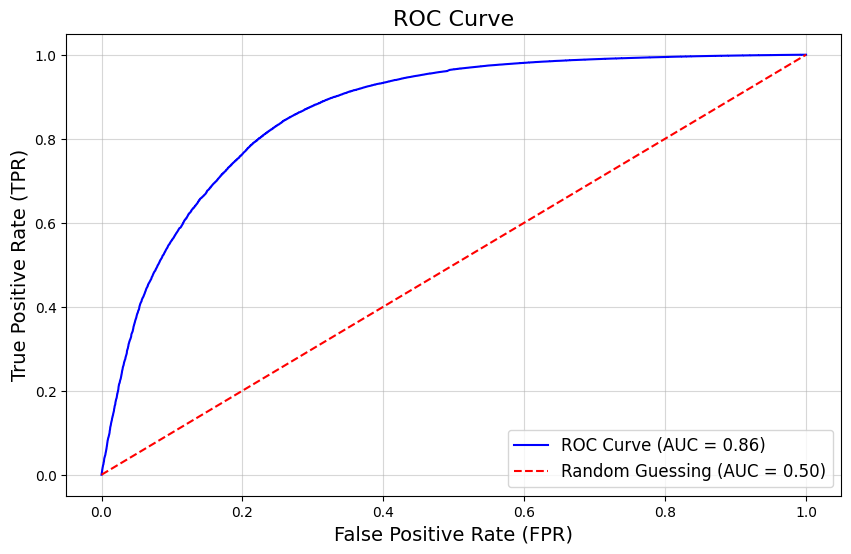

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 이진 레이블 생성 (4 이상을 1, 그 외를 0으로 변환)
data['binary_label'] = (data['star'] >= 4).astype(int)

# 실제 값 (binary_label)과 예측 점수 (sentiment_score)
y_true = data['binary_label']
y_scores = data['sentiment_score']

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# AUC 계산
auc = roc_auc_score(y_true, y_scores)
print(f"AUC: {auc:.2f}")

# ROC Curve 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing (AUC = 0.50)")

# 그래프 설정
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

Average Precision Score: 0.98


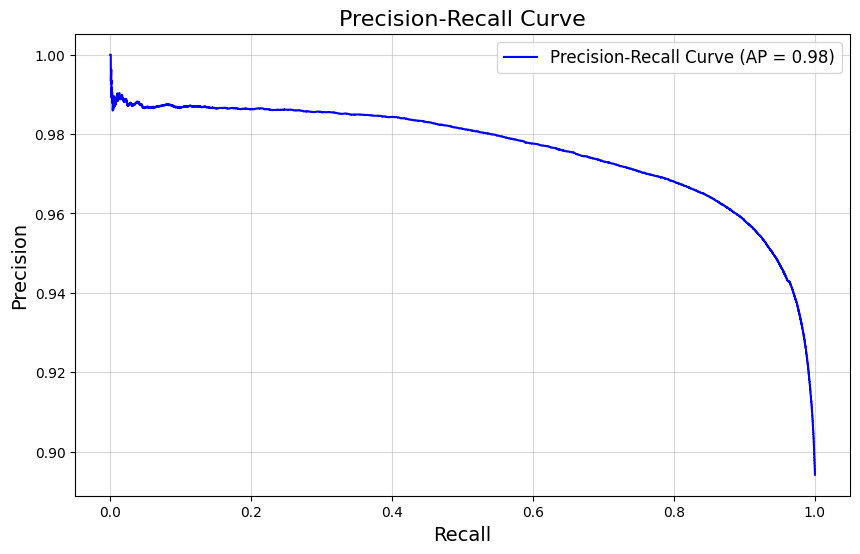

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Average Precision Score 계산
avg_precision = average_precision_score(y_true, y_scores)
print(f"Average Precision Score: {avg_precision:.2f}")

# Precision-Recall Curve 시각화
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})", color='blue')
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

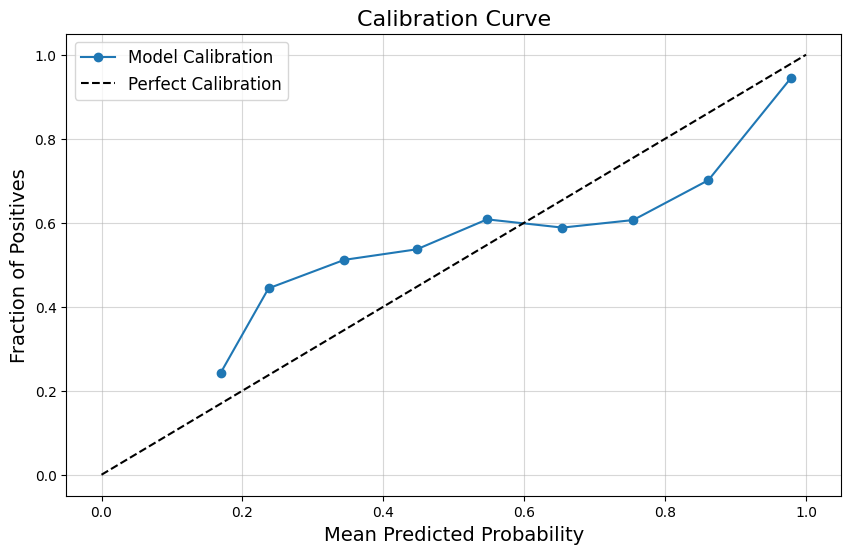

In [12]:
from sklearn.calibration import calibration_curve

# Calibration Curve 계산
prob_true, prob_pred = calibration_curve(y_true, y_scores, n_bins=10, strategy='uniform')

# Calibration Curve 시각화
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Model Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.xlabel("Mean Predicted Probability", fontsize=14)
plt.ylabel("Fraction of Positives", fontsize=14)
plt.title("Calibration Curve", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [13]:
# star 별 sentiment_score의 평균과 중앙값 확인
star_sentiment_avg = data.groupby('star')['sentiment_score'].agg(['mean', 'median'])
print(star_sentiment_avg)

          mean    median
star                    
0     0.245907  0.167493
1     0.308437  0.171137
2     0.466020  0.221702
3     0.737769  0.951554
4     0.917479  0.980791
5     0.966983  0.984457
